In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [3]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()

In [4]:
scaled_x = sx.fit_transform(df.drop('price', axis='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y = sy.fit_transform(df[['price']])
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [6]:
scaled_y = scaled_y.reshape(20)
scaled_y

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [7]:
# np.dot([1, 2], [1])
x = np.array([[1,2,3], [4,5,6]])
np.dot(x.T,[7,8])

array([39, 54, 69])

In [8]:
def batch_gradient_descent(x, y, epochs, learning_rate=0.01):
    w = np.ones(shape = (x.shape[1]))
    b = 0
    n = x.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w, x.T) + b
        w_grad = -2/n * np.dot(x.T, y - y_predicted)
        b_grad = -2/n * np.sum(y - y_predicted)
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.mean(np.square(y - y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list


In [9]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y, 1000)

In [10]:
w, b, cost

(array([0.66469087, 0.60541671]), -0.17792104056392882, 0.0048654808183488454)

Text(0, 0.5, 'cost')

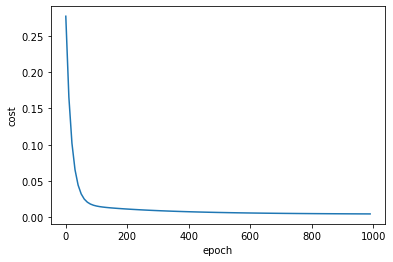

In [11]:
plt.plot(epoch_list, cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')

In [12]:
def predict(area, bedrooms, w, b):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    scaled_price = np.dot(w, scaled_x.T) + b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [13]:
predict(1500, 3, w, b)

70.50604143757819

In [14]:
import random

In [15]:
def stochastic_gradient_descent(x, y, epochs, learning_rate=0.01):
    w = np.ones(shape = (x.shape[1]))
    b = 0
    n = x.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0, x.shape[0]-1)
        sample_x = x[random_index]
        sample_y = y[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
        w_grad = -2/n * np.dot(sample_x.T, sample_y - y_predicted)
        b_grad = -2/n * (sample_y - y_predicted)
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.square(sample_y - y_predicted)

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list



In [16]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y, 10000)

In [17]:
w_sgd, b_sgd, cost_sgd

(array([0.7121226 , 0.67786491]), -0.23429717354813298, 0.02438557435580675)

In [18]:
w, b, cost

(array([0.66469087, 0.60541671]), -0.17792104056392882, 0.0048654808183488454)

Text(0, 0.5, 'cost')

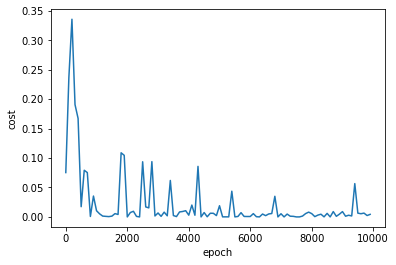

In [19]:
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.xlabel('epoch')
plt.ylabel('cost')

In [20]:
predict(2600, 4, w_sgd, b_sgd)

128.67466630521133

In [21]:
np.random.permutation(20)

array([13,  6,  7, 16, 12, 11, 17, 14,  3,  8,  2, 18, 10,  1,  4, 19,  5,
       15,  9,  0])

In [29]:
def mini_batch_gradient_descent(x, y, epochs, batch_size = 5, learning_rate=0.01):
    w = np.ones(shape = (x.shape[1]))
    b = 0
    n = x.shape[0]
    cost_list = []
    epoch_list = []
    if batch_size>n:
        batch_size = n
    for i in range(epochs):
        
        random_indices = np.random.permutation(n)
        x_temp = x[random_indices]
        y_temp = y[random_indices]
        for j in range(0, n, batch_size):
            x_batch = x_temp[j:j+batch_size]
            y_batch = y_temp[j:j+batch_size]   
            y_predicted = np.dot(w, x_batch.T) + b
            w_grad = -2/batch_size * np.dot(x_batch.T, y_batch - y_predicted)
            b_grad = -2/batch_size * np.sum(y_batch - y_predicted)
            w = w - learning_rate*w_grad
            b = b - learning_rate*b_grad
        
        cost = np.mean(np.square(y_batch - y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list



In [30]:
w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(scaled_x, scaled_y, 120, 5)

In [31]:
w_mbgd, b_mbgd, cost_mbgd

(array([0.71004249, 0.67810936]), -0.23340153957803614, 0.003289051896764505)

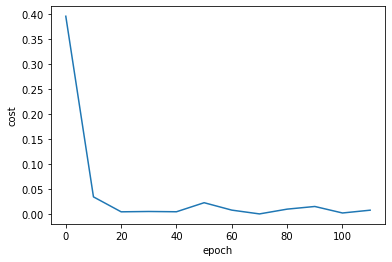

In [32]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_mbgd, cost_list_mbgd)

In [33]:
def prediction(area, bedrooms, w, b):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    scaled_price = np.dot(w, scaled_x) + b
    return sy.inverse_transform([[scaled_price]])[0][0]
    

In [34]:
predict(2600, 4, w, b)

124.97561189905038